In [125]:
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
import joblib
import seaborn as sns
import bokeh

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# loading the data

In [2]:
df = joblib.load(open('imbalanced_sample_data_cleaned.pkl', 'rb'))
df = df.reset_index(drop=True)
#df = df.sample(len(df))

# data investigation

**A word of warning : drawing graphs in Jupyter is one thing, but it doesn't beat good-old-fashioned... manually reading through thousands of examples to really get a feel for what your data actually is.  This is especially important when you have many classes as your data is going to cover a broad range of domains, you need to at least try and get familiar with the most common classes. If you don't do this you risk missing key insights**

In [5]:
df.sample(5).to_dict(orient='rows')


[{'clipped_created_utc': 1501545600.0,
  'created_utc': 1502490105,
  'subreddit': 'RWBY',
  'text': "Introducing a better, more positive alternative to this sub: r/JRWBY! ||| So I was just scrolling through r/RWBY one day, minding my own business, and I saw this really neat Jaune topic pop up. I was like, damn, that's my boi! So I clicked it and started reading. To my utter dismay though I found people insulting the guy. Teasing him and his fans.\n\nI could stand it NO LONGER! This was the straw, no, the *Arc* that broke the camels back. I needed to create a place where my fellow RWBY fans who also appreciated Jaune could go and feel safe, feel wanted. A place where we could discuss RWBY (AND Jaune) without having to deal with people insulting him!\n\nSo, my friends, I introduce you the solution. The golden fruit from a heavenly tree. The promised land is here.\n\n***[r/JRWBY.](https://www.reddit.com/r/JRWBY/)***\n\nWhat is r/JRWBY, you ask? Well, in a nutshell, it's r/RWBY but better

### categories

In [30]:
from collections import defaultdict

all_topics = set(df.topic)

print('number of categories =', len(all_topics))

top_to_second = defaultdict(list)

for s in all_topics:
    split = s.split('; ')
    top_level = split[0]
    second_level = split[1]
    
    top_to_second[top_level].append(second_level)

number of categories = 1043


In [11]:
import random

for k, subcat in list(top_to_second.items()):
    print(k)
    for s in subcat:
        print('\t', s)

video_game
	 fire emblem
	 dragon age
	 starcraft
	 yogscast
	 sonic
	 xenoblade chronicles
	 world of tanks
	 castle clash
	 arms
	 digimon
	 diablo
	 europa universalis
	 football manager
	 super smash bros
	 eve online
	 halo
	 megaten
	 swag bucks
	 arena of valor
	 animal crossing
	 endless frontier
	 path of exile
	 crusader kings
	 ftl
	 life is strange
	 world of warcraft
	 the elder scrolls
	 summoners war
	 vainglory
	 five nights at freddys
	 realm of the mad god
	 pro evolution soccer
	 dota
	 albion
	 tree of savior
	 puzzle and dragons
	 duelyst
	 neopets
	 world of warships
	 hearts of iron
	 dark souls
	 dungeon crawl
	 space station 13
	 love nikki
	 walking war robots
	 diep.io
	 runescape
	 splatoon
	 lineage
	 ingress
	 tibia
	 nioh
	 dofus
	 everquest
	 fifa
	 let it die
	 grim dawn
	 memory defrag
	 hearthstone
	 futurama
	 mopeio
	 valkyrie
	 idle heroes
	 steins gate
	 minecraft
	 black desert
	 danganronpa
	 clash of clans
	 ace attorney
	 batttlecats
	 kingdom

sports
	 swimming
	 darts
	 equestrian
	 disc golf
	 obstacle course
	 rugby
	 bicycle related
	 volleyball
	 tennis
	 ju jitsu
	 bowling
	 billiards
	 skiing
	 weightlifting/strength training
	 baseball
	 golf
	 soccer
	 archery
	 lacrosse
	 running
	 triathlon
	 cricket
	 fencing
	 roller blading
	 mma
	 formula 1
	 football
	 wrestling
	 nascar
	 surfing
	 kayaking
	 ultimate frisbee
	 climbing
	 boxing
	 judo
	 basketball
	 rowing
	 snowboarding
	 hockey
	 skateboarding
card_game
	 shadowverse
	 dragon ball
	 final fantasy
	 dc universe
	 eternal card game
	 pokemon
	 legend of the five rings
	 force of will
	 girls x battle
	 dragon ball z
	 poker
	 magic the gathering
	 pauper
	 card fight
	 netrunner
hardware/tools
	 nerf
	 hvac
	 pens
	 mechanical keyboard
	 doorbells
	 mattress
	 telescopes
	 hookah
	 wicked edge
	 gym equipment
	 guns
	 scooters
	 watercooling
	 notebooks
religion/supernatural
	 islamism
	 judaism
	 witchcraft
	 hinduism
	 tarot cards
	 atheism
	 dimension ju

In [ ]:
## draw some graphs

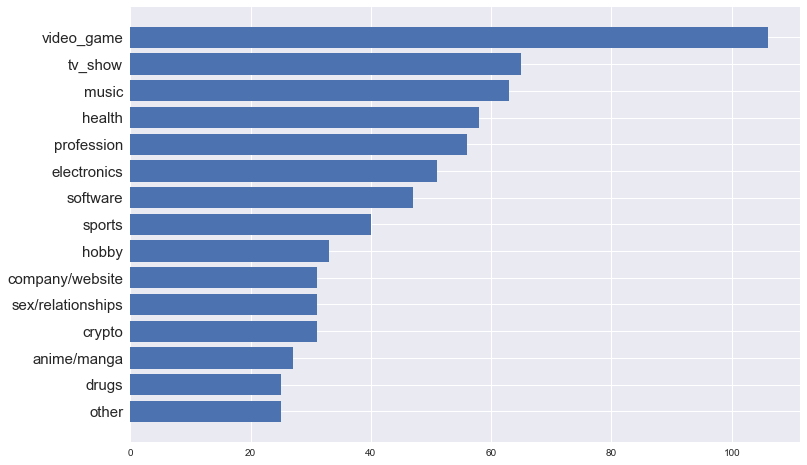

In [19]:
category_to_num = {k : len(v) for k,v in top_to_second.items()}
ctr = Counter(category_to_num)
pairs = list(ctr.most_common(15))
pairs = list(reversed(pairs))

categories, nums = zip(*pairs)

fig, ax = plt.subplots(figsize=(12,8))

plt.barh(categories, nums)

ax.set_yticklabels(categories, fontsize=15)

plt.show()

In [23]:
from collections import Counter



In [24]:
from collections import Counter

subreddit_counter = Counter(df.topic)

In [21]:
subreddit_counter.most_common(20)

[('advice/question; legal advice', 3019),
 ('sports; wrestling', 1122),
 ('video_game; runescape', 1028),
 ('video_game; clash royale', 990),
 ('crypto; bitcoin', 897),
 ('appearance; skincare', 839),
 ('music; guitar', 823),
 ('stem; computer science', 739),
 ('writing/stories; jokes', 700),
 ('parenting; pregnancy', 653),
 ('other; history', 632),
 ('profession; mechanics', 625),
 ('company/website; video streaming; twitch', 623),
 ('health; adhd', 609),
 ('software; spreadsheet; excel', 593),
 ('hardware/tools; mechanical keyboard', 591),
 ('programming; python', 526),
 ('video_game; fire emblem', 501),
 ('software; microsoft os; windows', 477),
 ('video_game; EA NHL', 476)]

In [31]:
import numpy as np
counts = [x[1] for x in subreddit_counter.most_common()]
np.array(counts)

array([3019, 1122, 1028, ...,   13,   12,   12])

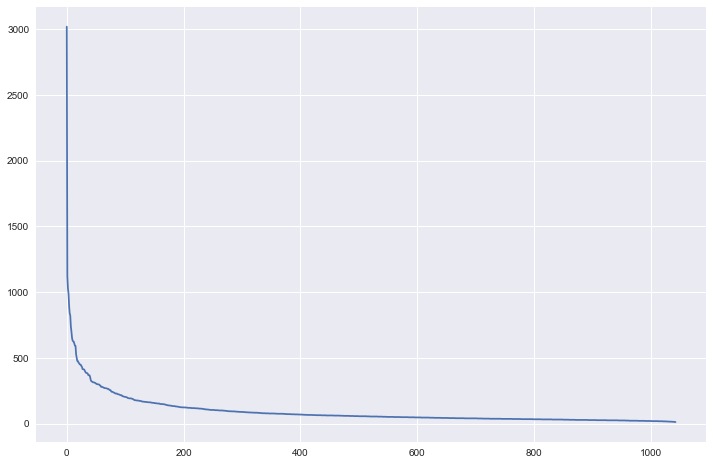

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(range(len(counts)), counts)


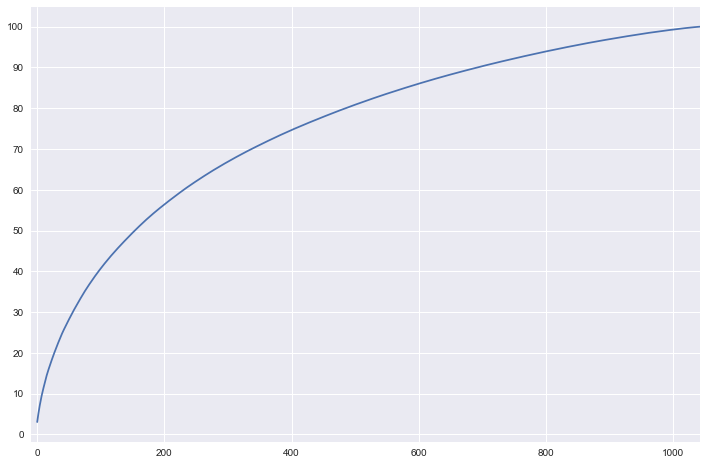

In [39]:
total = sum(counts)

cum_sum = np.cumsum(counts)
cum_sum = 100 * cum_sum / total

plt.figure(figsize=(12,8))
plt.plot(range(len(cum_sum)), cum_sum)
plt.xlim((-10, len(cum_sum)))
plt.yticks(range(0,110, 10))
plt.show()
#plt.hlines(50, 0, len(cum_sum))

### posts over time / subreddits over time


In [40]:
import datetime
from dateutil.relativedelta import relativedelta
import time

min_utc = min(df.created_utc)
min_utc = datetime.datetime.fromtimestamp(min_utc)

min_datetime = datetime.datetime(2016, 6, 1, 0, 0, 0)
max_datetime = datetime.datetime(2018, 6, 1, 0, 0, 0)
xtickdatetimes = [min_datetime,]
curr_time = min_utc

while curr_time < max_datetime:
    next_time = curr_time + relativedelta(months=3)
    xtickdatetimes.append(next_time)
    curr_time = next_time
    
xticks = [time.mktime(d.timetuple()) for d in xtickdatetimes]
xlabels = [d.strftime('%Y-%m') for d in xtickdatetimes]

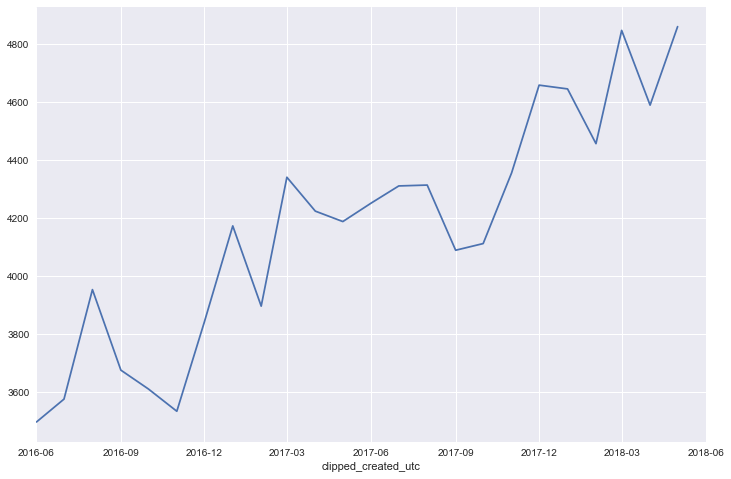

In [52]:

gb = df.groupby('clipped_created_utc')

month_counts = gb.size()

plt.figure(figsize=(12,8))

ax = month_counts.plot()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
plt.show()

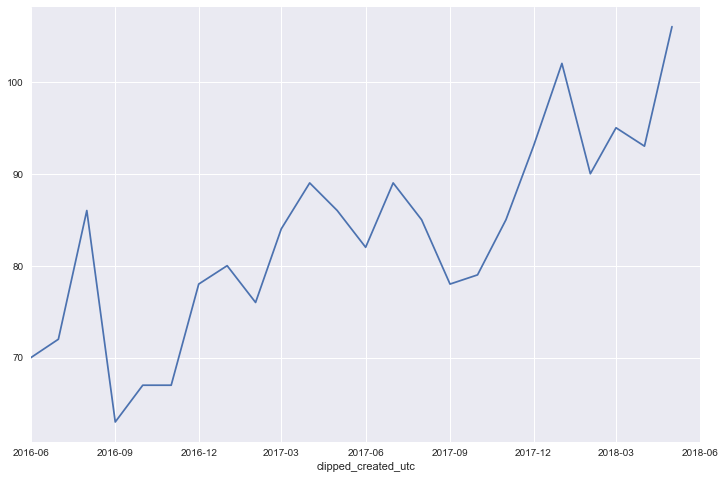

In [50]:
# number of subreddits by month

matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)


def count_subreddits(subdf):
    ctr = Counter(subdf.subreddit)
    
    return len([k for k, v in ctr.items() if v > 10])

gb = df.groupby('clipped_created_utc')
month_counts = gb.apply(count_subreddits)

ax = month_counts.plot()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
plt.show()

### words 

In [53]:
## words per post

import re

token_pattern= re.compile('(?u)\\b\\w+\\b')

def words_per_post(s):
    return len(token_pattern.findall(s))

words_per_post = [words_per_post(s) for s in df.text]

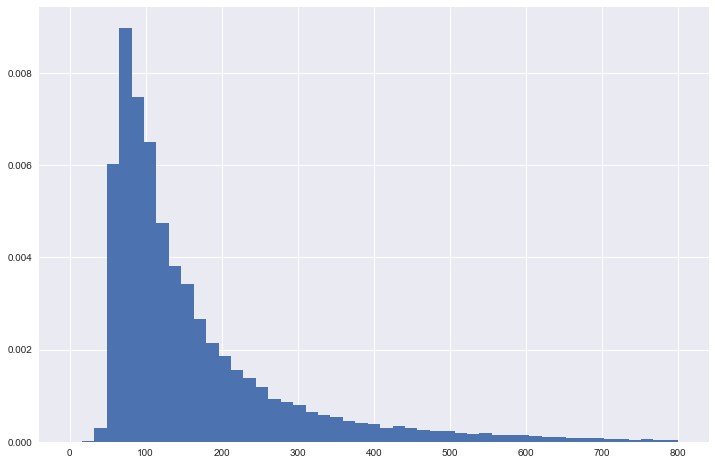

In [54]:
plt.hist(words_per_post, density=True, bins=np.linspace(0, 800, 50))
plt.show()

In [57]:
all_words = set()

for s in df.text:
    words = token_pattern.findall(s)
    all_words.update(words)
    
len(all_words)

298321

In [99]:
word_counter = Counter()

for s in df.text:
    words = token_pattern.findall(s)
    word_counter.update(words)
    
len(word_counter)

total_words = sum(word_counter.values())

print('average words per post = ', total_words / len(df))

average words per post =  162.51535


In [100]:
len(df) / (total_words / len(df))

615.326490697648

## <- back to slides 

# splitting the data

Slightly unusually, we are going to split the data based on _chronology_ rather than splitting randomly (reason to be discussed later)

In [58]:
from sklearn.model_selection import train_test_split

test_split_time = np.percentile(df.created_utc, 80)

old_df = df[df.created_utc < test_split_time]
test_df  = df[df.created_utc >= test_split_time]

train_df, val_df = train_test_split(old_df, test_size=0.2)

In [59]:
X_train_, y_train_ = train_df.text, train_df.topic
X_val_  , y_val_   = val_df.text  , val_df.topic
X_test_ , y_test_  = test_df.text , test_df.topic

X_train_.shape, X_val_.shape, X_test_.shape

((64000,), (16000,), (20000,))

# primer on bag-of-words classification

In [93]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(
                             max_features = 5000, 
                             ngram_range=(1,2),
                             stop_words='english',
                            )



vectorizer.build_analyzer()('the cat sat on the mat sat')

['cat', 'sat', 'mat', 'sat', 'cat sat', 'sat mat', 'mat sat']

In [70]:
X_train = vectorizer.fit_transform(X_train_)  ## will take ages
print('vectorizer has been fit...')
X_val   = vectorizer.transform(X_val_)
X_test  = vectorizer.transform(X_test_)

vectorizer has been fit...


In [76]:
X_train.count_nonzero() / (np.prod(X_train.shape))

0.009013234375

In [84]:
X_train

<64000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2884235 stored elements in Compressed Sparse Row format>

In [87]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_all = list(df.topic)
label_encoder.fit(y_all)
y_train = label_encoder.transform(y_train_)
y_val   = label_encoder.transform(y_val_)
y_test  = label_encoder.transform(y_test_)

In [88]:
y_train

array([ 315,  926, 1032, ...,    7,  649,  934])

In [89]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

### valuation set accuracy

In [101]:
from sklearn.metrics import accuracy_score

y_val_pred = nb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)

accuracy

0.475125

### test set accuracy

In [102]:
from sklearn.metrics import accuracy_score

y_test_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)

accuracy

0.4437

## <- back to slides 

# t-SNE

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def apply(subdf):
    subdf = subdf.sample(100)
    text = list(subdf.text)
    text = '\n'.join(text)
    return text

tsne_df = df.groupby('subreddit').apply(apply)

tsne_df = tsne_df.reset_index(drop=False)
tsne_df.columns = ['subreddit', 'text']

X_tsne_ = tsne_df.text
y_tsne_ = tsne_df.subreddit

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

vectorizer = TfidfVectorizer(
                             max_features = 30000, 
                             ngram_range=(1,1),
                             min_df=5,
                             stop_words='english',
                            )

X_tsne = vectorizer.fit_transform(X_tsne_)  ## will take ages

svd  = TruncatedSVD(n_components=100)
tsne = TSNE(n_components=2, verbose=1)

X_tsne = svd.fit_transform(X_tsne)
X_tsne = tsne.fit_transform(X_tsne)

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

xs, ys = zip(*X)

tsne_df['x'] = xs
tsne_df['y'] = ys

y = LabelEncoder().fit_transform(y_)
colors = sns.color_palette("hls", max(y) + 1).as_hex()
y_colors = [colors[i] for i in y]

tsne_df['color'] = y_colors

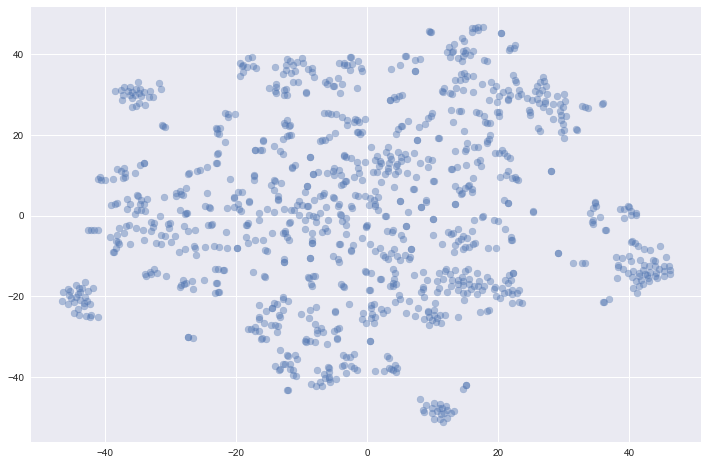

In [105]:
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)


#tsne_df[[c for c in tsne_df.columns if not c == 'text']].to_csv('tsne_df.csv', index=False)
tsne_df = pd.read_csv('tsne_df.csv')

xs, ys = tsne_df['x'], tsne_df['y']

plt.scatter(xs, ys, alpha=0.4)

In [112]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool
import matplotlib as mpl

output_notebook()


source_train = ColumnDataSource(
        data=dict(
            x = tsne_df['x'],
            y = tsne_df['y'],
            colors = tsne_df['color'],
            subreddit= tsne_df['subreddit']
        )
    )

hover_tsne = HoverTool(names=["train"], 
                       tooltips=[("""subreddit""",
                                  """<font face="Arial" size="3">@subreddit</font>""")])
tools_tsne = [hover_tsne, 'pan', 'wheel_zoom', 'reset']
plot_tsne = figure(plot_width=700, plot_height=500, tools=tools_tsne, title='Subreddits')

plot_tsne.circle('x', 'y', size=10, fill_color='colors', 
                 alpha=0.5, line_width=0, source=source_train, name="train")


show(plot_tsne)

Loading BokehJS ...

## <- back to slides 

# macro score

In [113]:
from sklearn.metrics import accuracy_score, precision_score
import warnings
warnings.filterwarnings('ignore')

y_val_pred = nb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
macro_score = precision_score(y_val, y_val_pred, average='macro')

accuracy, macro_score

(0.475125, 0.3379731038454041)

In [114]:
from sklearn.metrics import accuracy_score, precision_score
import warnings
warnings.filterwarnings('ignore')

y_test_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
macro_score =  precision_score(y_test, y_test_pred, average='macro')

accuracy, macro_score

(0.4437, 0.32089548165500065)

## <- back to slides 

## feature selection

In [115]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

print('fitting vectorizer...')

vectorizer_v2 = CountVectorizer(max_features = 10000,
                                min_df=5,
                                ngram_range=(1,2),
                                stop_words='english',
                                token_pattern='(?u)\\b\\w+\\b',
                            )

X_train_v2 = vectorizer_v2.fit_transform(X_train_)  ## will take ages


fitting vectorizer...


In [117]:
from sklearn.feature_selection import chi2, SelectKBest

max_features  = 5000
chi2_selector = SelectKBest(chi2, max_features)

chi2_selector.fit(X_train_v2, y_train)

SelectKBest(k=5000, score_func=<function chi2 at 0x14be69c80>)

In [118]:
import warnings
warnings.filterwarnings('ignore')

X_train_v2 = chi2_selector.transform(X_train_v2)

In [120]:
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_v2, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [122]:
import warnings
warnings.filterwarnings('ignore')

X_val_v2  =  chi2_selector.transform(vectorizer_v2.transform(X_val_))
X_test_v2 =  chi2_selector.transform(vectorizer_v2.transform(X_test_))

In [123]:
from sklearn.metrics import accuracy_score, precision_score

y_val_pred = nb_model.predict(X_val_v2)

accuracy = accuracy_score(y_val, y_val_pred)
macro_score = precision_score(y_val, y_val_pred, average='macro')

print('validation set scores', accuracy, macro_score)

validation set scores 0.53875 0.4165303277780988


In [124]:
from sklearn.metrics import accuracy_score, precision_score

y_test_pred = nb_model.predict(X_test_v2)

accuracy = accuracy_score(y_test, y_test_pred)
macro_score = precision_score(y_test, y_test_pred, average='macro')

print('test set scores', accuracy, macro_score)

test set scores 0.5028 0.3832956201883086


## vanilla fasttext model (GOTO full notebook)

In [26]:
import scipy.sparse
from keras.preprocessing import sequence
from keras.layers import (GlobalAveragePooling1D, Embedding, Dropout, Input, Dense,
                          concatenate, BatchNormalization, 
                          )
from keras.models import Model

def convert_sparse_matrix_for_fasttext(sparse_matrix):
    idx_array = [list() for _ in range(sparse_matrix.shape[0])]
    for row, col, val in zip(*scipy.sparse.find(sparse_matrix)):
        idx_array[row] += [col] * 1  # val
    X = sequence.pad_sequences(idx_array, maxlen=349, padding='post', truncating='post')
    return X
    
X_train_ft = convert_sparse_matrix_for_fasttext(X_train_v2)
X_val_ft   = convert_sparse_matrix_for_fasttext(X_val_v2)
X_test_ft  = convert_sparse_matrix_for_fasttext(X_test_v2)


DROPOUT_RATE = 0.3
INPUT_LENGTH = 349
EMBEDDING_DIM = 100
MAX_FEATURES = 30000
num_classes = len(set(y_all))

nb_values = MAX_FEATURES + 2

input_ = Input(shape=(INPUT_LENGTH,))
embedding_module = Embedding(nb_values, EMBEDDING_DIM, input_length=INPUT_LENGTH)(input_)

module = GlobalAveragePooling1D()(embedding_module)
module = BatchNormalization()(module)
module = Dropout(rate=DROPOUT_RATE)(module)
module = Dense(EMBEDDING_DIM, activation='relu')(module)
module = BatchNormalization()(module)
module = Dropout(rate=DROPOUT_RATE)(module)

prediction = Dense(num_classes, activation='softmax')(module)
fasttext_model = Model(inputs=input_, outputs=prediction)
fasttext_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fasttext_model.fit(X_train_ft, y_train, epochs = 3, validation_split=0.1)

/home/mike/.conda/envs/work/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [39]:
fasttext_model.save('fasttext_model.keras')

In [34]:
TO_TAKE = 100000

y_val_pred_proba = fasttext_model.predict(X_val_ft[:TO_TAKE])

y_val_pred = y_val_pred_proba.argmax(axis=1)

accuracy = np.mean(y_val_pred == y_val[:TO_TAKE])
macro_f1 = f1_score(y_val[:TO_TAKE], y_val_pred, average='macro')

accuracy, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.24251, 0.6983652224814777)

In [36]:
TO_TAKE = 100000

y_test_pred_proba = fasttext_model.predict(X_test_ft[:TO_TAKE])
y_test_pred = y_test_pred_proba.argmax(axis=1)
error_rate = 1 - np.mean(y_test_pred == y_test[:TO_TAKE])
macro_f1 = f1_score(y_test[:TO_TAKE], y_test_pred, average='macro')
accuracy, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.27303, 0.6663239517686133)

## prior reweight

In [37]:
ctr = Counter(y_train)

current_prior = [ctr[i] for i in range(num_classes)]
current_prior =np.array([y /  len(y_train) for y in current_prior])

ctr = Counter(y_test)

target_prior = [ctr[i] for i in range(num_classes)]
target_prior = np.array([y /  len(y_test) for y in target_prior])
target_prior

oversample_arr = target_prior / current_prior
oversample_arr = np.clip(oversample_arr, 0.01, 100)
oversample_arr

/home/mike/.conda/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


array([1.62783576, 0.94601482, 0.88617186, ..., 1.68028567, 0.89205778,
       1.09274584])

In [38]:
TO_TAKE = 100000

y_test_pred_proba = fasttext_model.predict(X_test_ft[:TO_TAKE])

y_test_pred_proba *= oversample_arr

y_test_pred = y_test_pred_proba.argmax(axis=1)

error_rate = 1 - np.mean(y_test_pred == y_test[:TO_TAKE])
macro_f1 = f1_score(y_test[:TO_TAKE], y_test_pred, average='macro')

error_rate, macro_f1

/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mike/.conda/envs/work/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.26083999999999996, 0.6818353919370107)